            User_ID           Age  Marital_Status        Orders        Amount
count  1.123900e+04  11239.000000    11239.000000  11239.000000  11239.000000
mean   1.003004e+06     35.410357        0.420055      2.489634   9453.610553
std    1.716039e+03     12.753866        0.493589      1.114967   5222.355168
min    1.000001e+06     12.000000        0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000        0.000000      2.000000   5443.000000
50%    1.003064e+06     33.000000        0.000000      2.000000   8109.000000
75%    1.004426e+06     43.000000        1.000000      3.000000  12675.000000
max    1.006040e+06     92.000000        1.000000      4.000000  23952.000000
                Age        Orders        Amount
count  11239.000000  11239.000000  11239.000000
mean      35.410357      2.489634   9453.610553
std       12.753866      1.114967   5222.355168
min       12.000000      1.000000    188.000000
25%       27.000000      2.000000   5443.000000
50%       

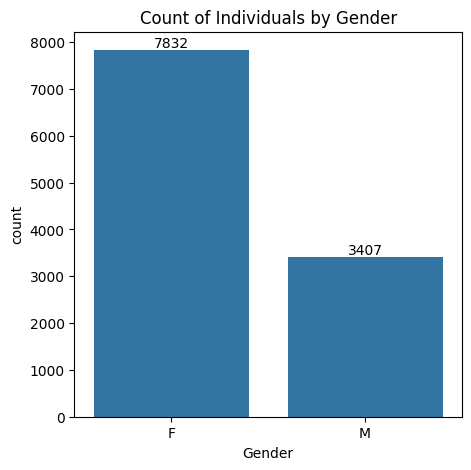

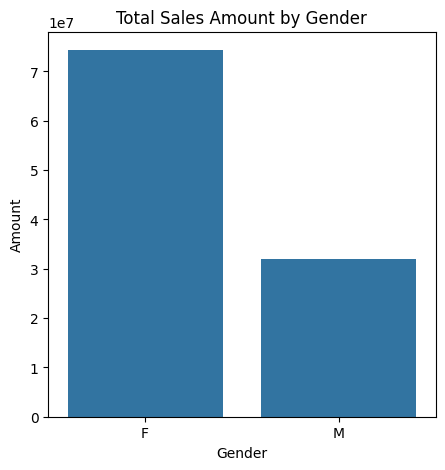

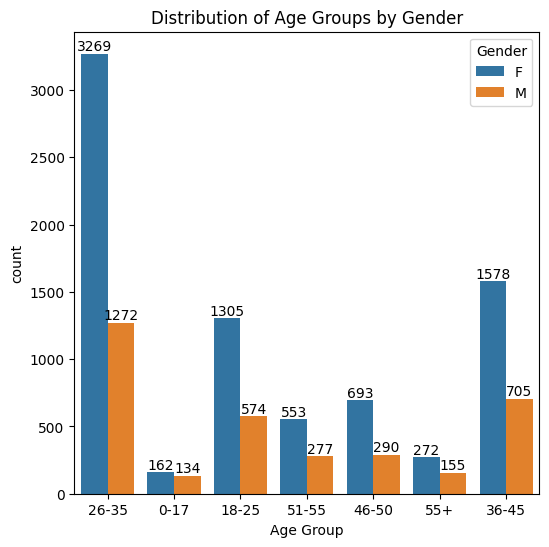

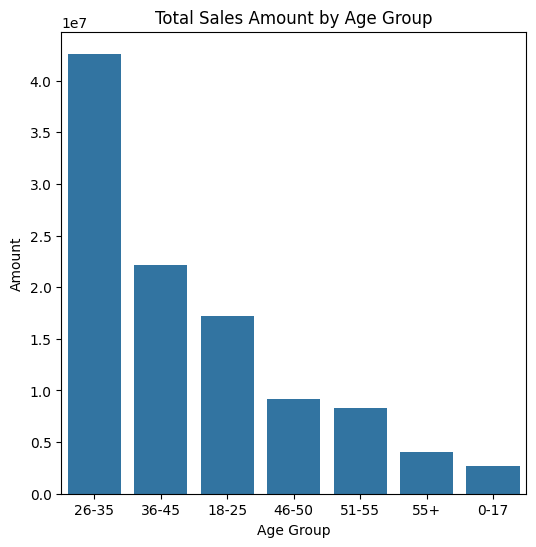

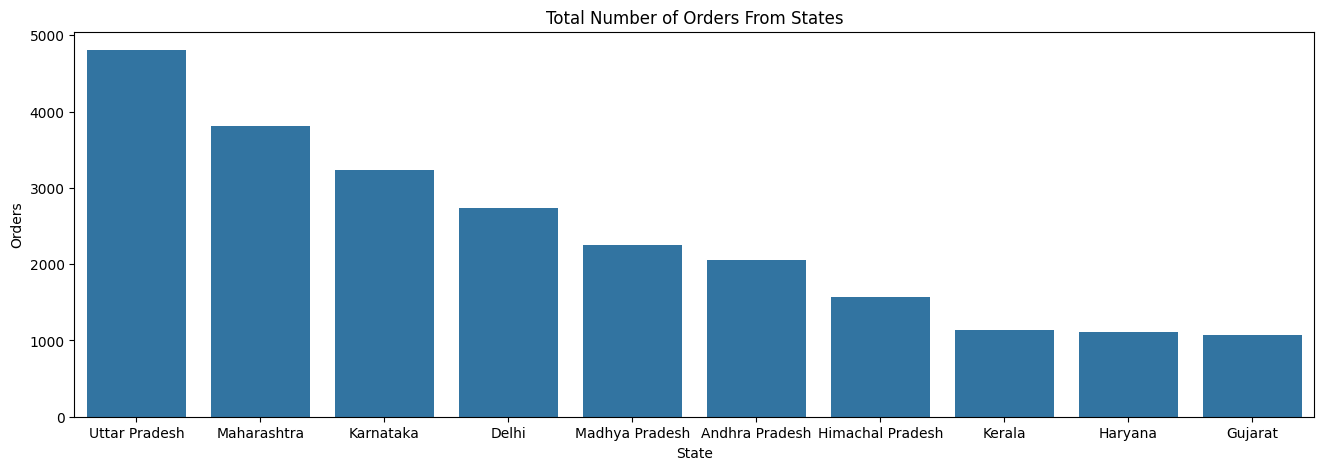

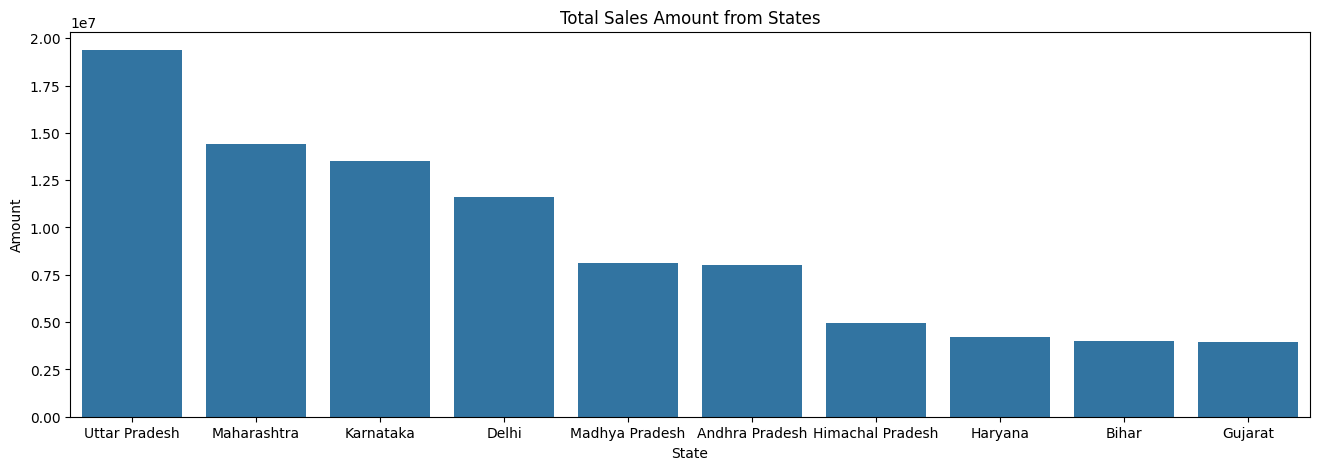

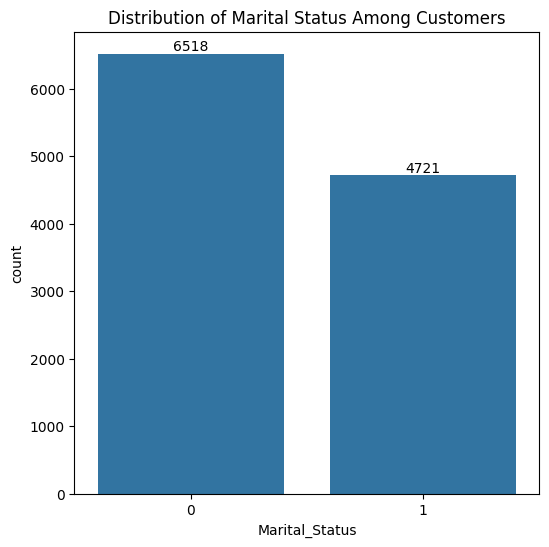

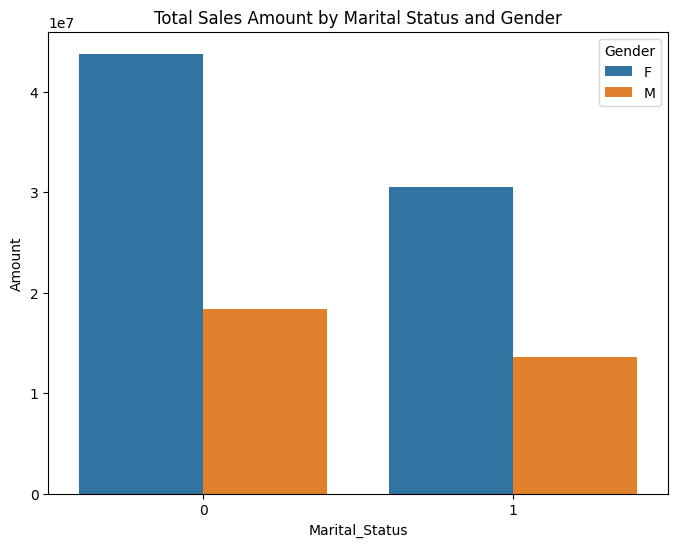

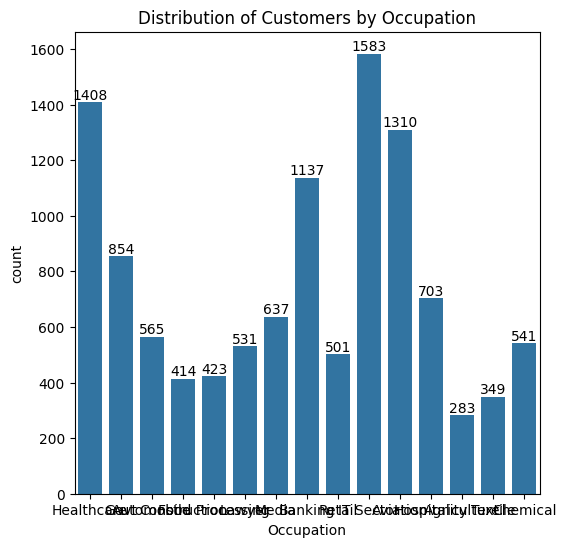

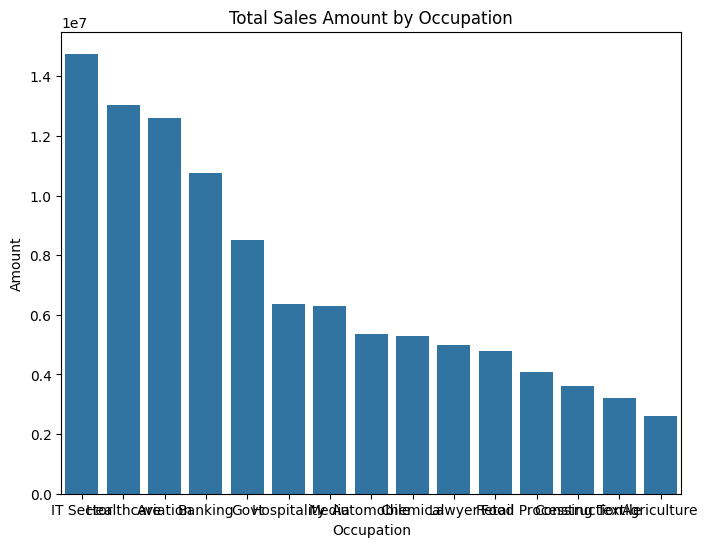

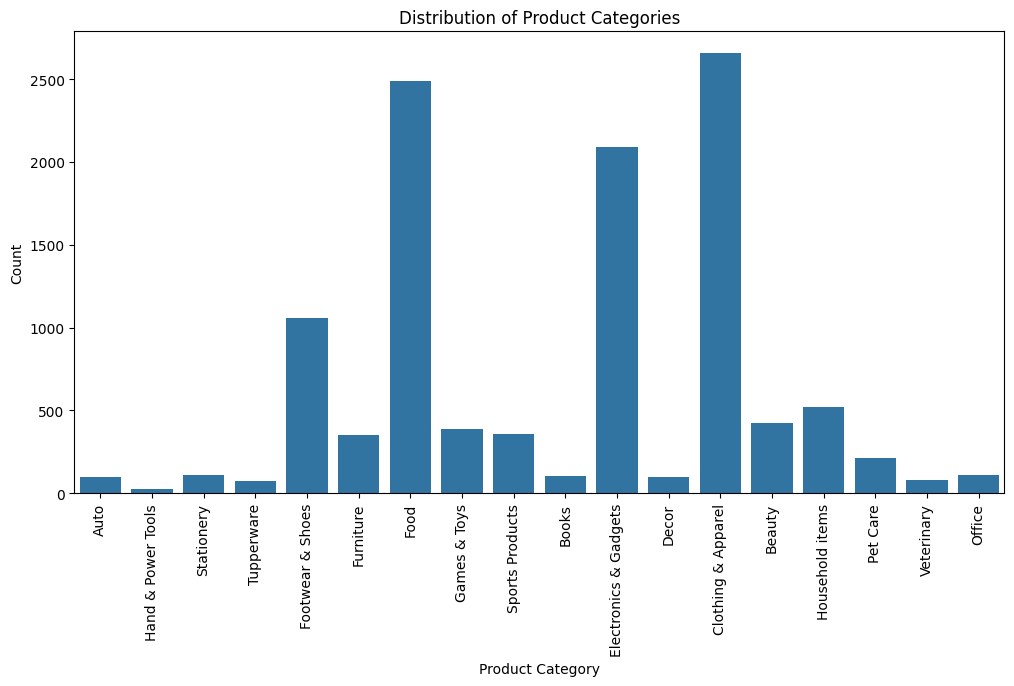

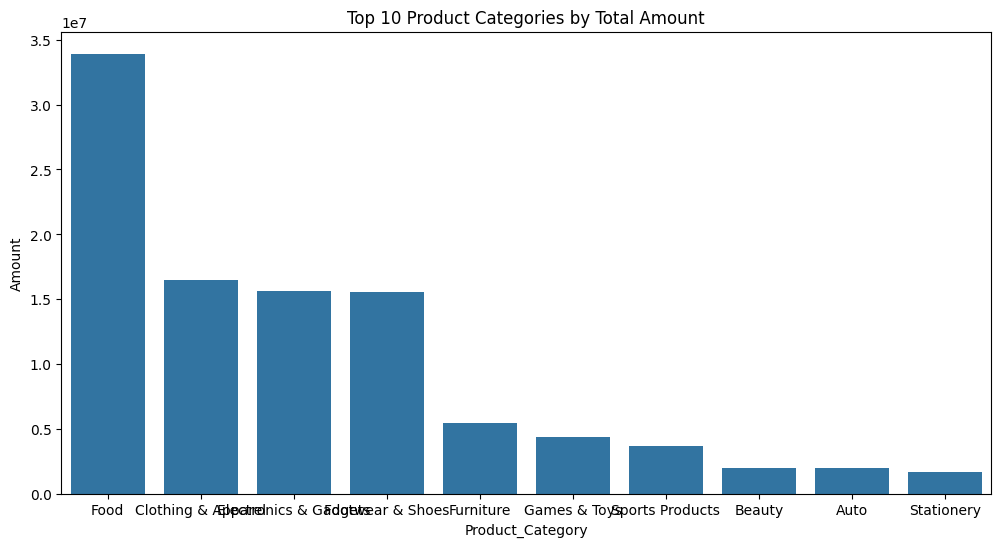

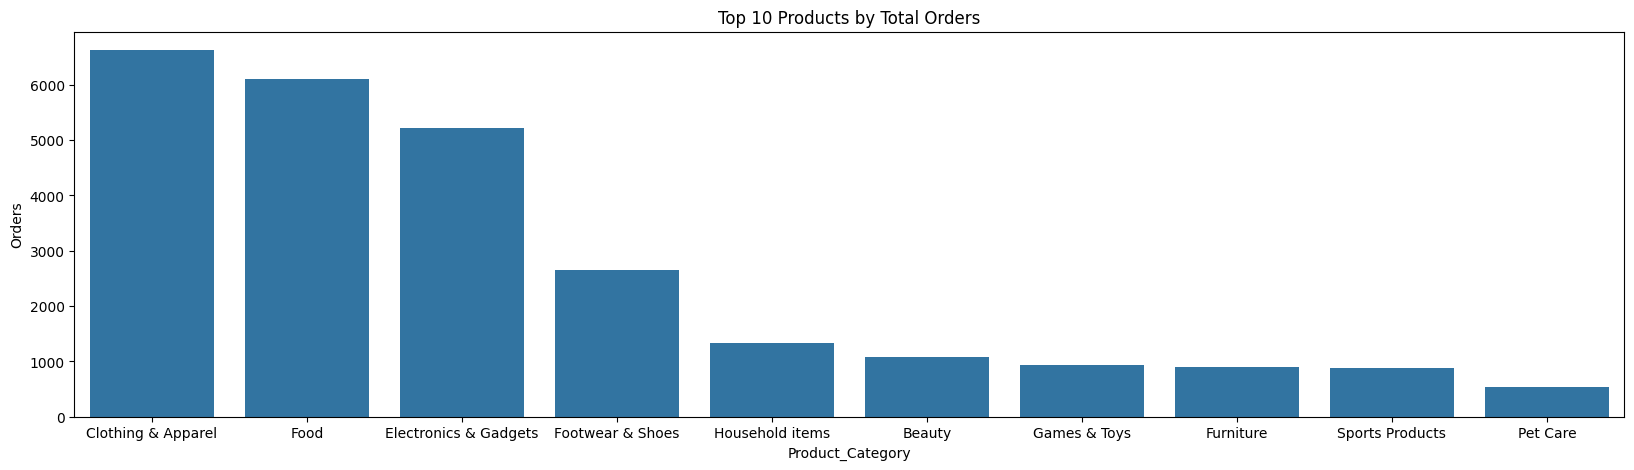

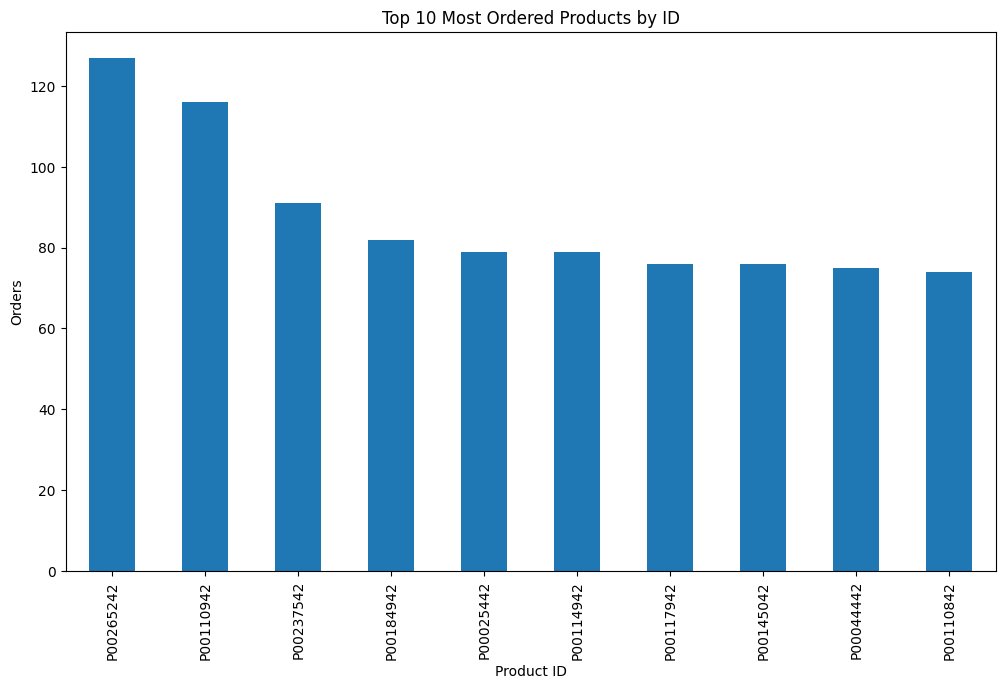

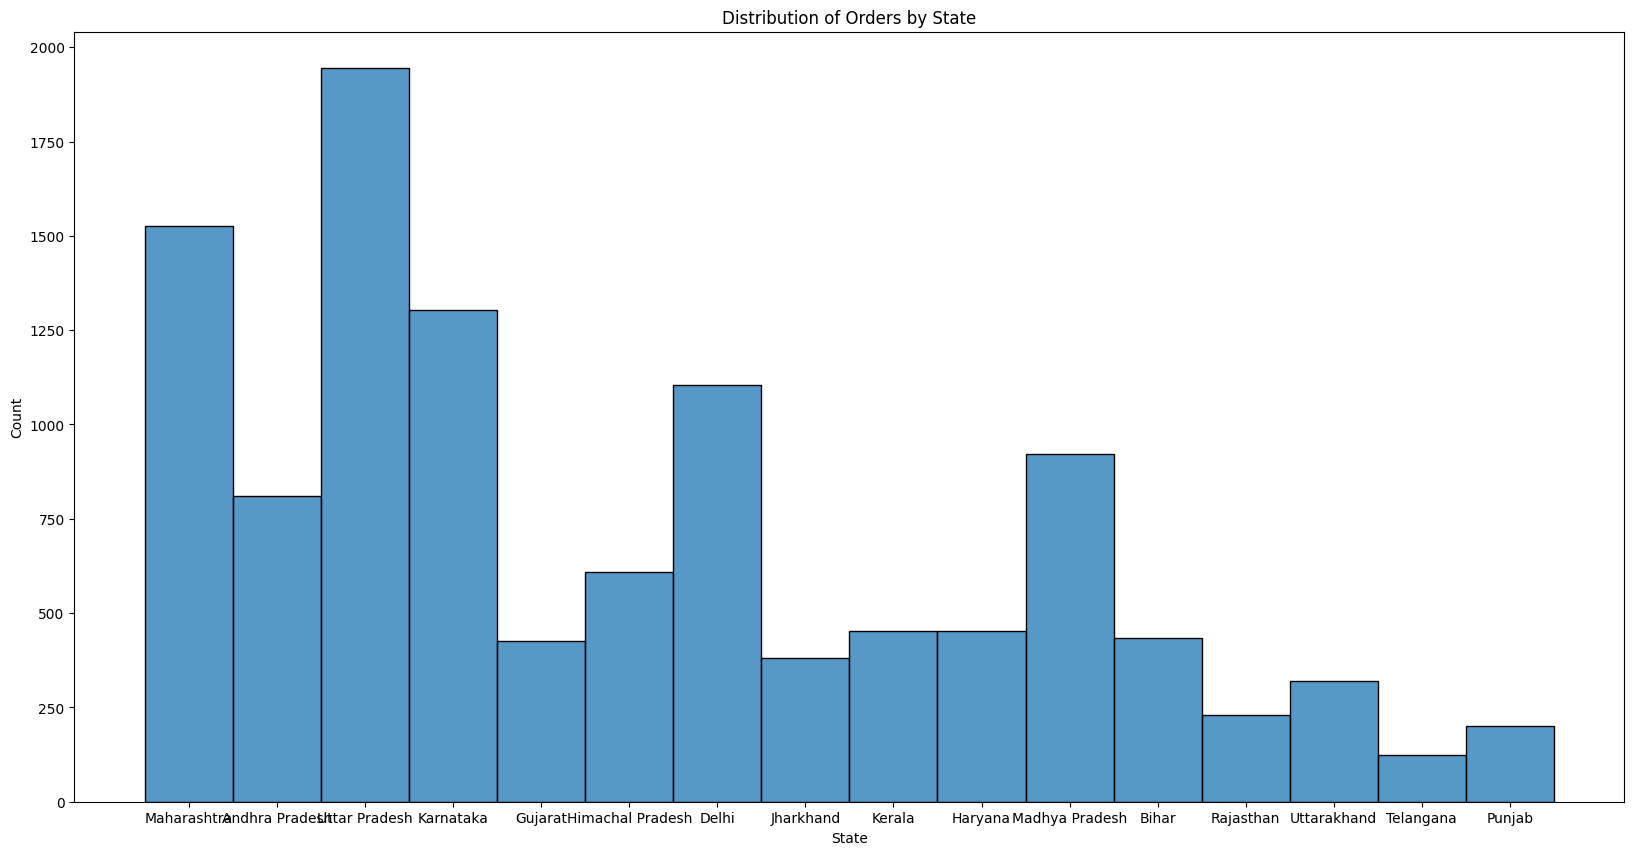

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with error handling for encoding
csv_file_path = "diwali_sales.csv"
try:
    df = pd.read_csv(csv_file_path, encoding='latin1')  # Adjust encoding if needed
except UnicodeDecodeError:
    df = pd.read_csv(csv_file_path, encoding='utf-8-sig')  # Try a different encoding if needed

# Drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

# Check for null values and drop them
df.dropna(inplace=True)

# Convert 'Amount' column to integer
df['Amount'] = df['Amount'].astype(int)

# Describe the DataFrame
print(df.describe())

# Describe specific columns
print(df[['Age', 'Orders', 'Amount']].describe())

# EDA Analysis

# Plotting a bar chart for Gender and its count
plt.figure(figsize=(5, 5))
ax = sns.countplot(x='Gender', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Individuals by Gender")
plt.show()

# Total Sales Amount by Gender
plt.figure(figsize=(5, 5))
sales_gen = df.groupby('Gender', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gen)
plt.title("Total Sales Amount by Gender")
plt.show()

# Distribution of Age Groups by Gender
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title("Distribution of Age Groups by Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Total Sales Amount by Age Group
plt.figure(figsize=(6, 6))
sales_age = df.groupby('Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)
plt.title("Total Sales Amount by Age Group")
plt.show()

# Total Number of Orders From Top 10 States
plt.figure(figsize=(16, 5))
sales_state = df.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data=sales_state, x='State', y='Orders')
plt.title("Total Number of Orders From States")
plt.show()

# Total Sales Amount from Top 10 States
plt.figure(figsize=(16, 5))
sales_state = df.groupby('State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data=sales_state, x='State', y='Amount')
plt.title("Total Sales Amount from States")
plt.show()

# Distribution of Marital Status Among Customers
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='Marital_Status')
plt.title("Distribution of Marital Status Among Customers")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Total Sales Amount by Marital Status and Gender
plt.figure(figsize=(8, 6))
sales_marital_gender = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_marital_gender, x='Marital_Status', y='Amount', hue='Gender')
plt.title("Total Sales Amount by Marital Status and Gender")
plt.show()

# Distribution of Customers by Occupation
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df, x='Occupation')
plt.title("Distribution of Customers by Occupation")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Total Sales Amount by Occupation
plt.figure(figsize=(8, 6))
sales_occupation = df.groupby('Occupation', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=sales_occupation, x='Occupation', y='Amount')
plt.title("Total Sales Amount by Occupation")
plt.show()

# Distribution of Product Categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=90)
plt.show()

# Top 10 Product Categories by Total Amount
plt.figure(figsize=(12, 6))
top_product_categories = df.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.barplot(data=top_product_categories, x='Product_Category', y='Amount')
plt.title("Top 10 Product Categories by Total Amount")
plt.show()

# Top 10 Products by Total Orders
plt.figure(figsize=(20, 5))
top_products_orders = df.groupby('Product_Category', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(data=top_products_orders, x='Product_Category', y='Orders')
plt.title("Top 10 Products by Total Orders")
plt.show()

# Top 10 Most Ordered Products (Product_ID)
plt.figure(figsize=(12, 7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title("Top 10 Most Ordered Products by ID")
plt.xlabel('Product ID')
plt.ylabel('Orders')
plt.show()

# Distribution of Orders by State
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x="State")
plt.title("Distribution of Orders by State")
plt.show()
